In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt
from tqdm import tqdm
import time
import numpy as np


In [56]:
hop = pd.read_excel("잡코리아_합격자소서 @220310.xlsx")

In [57]:
print(hop.isnull().values.any())
#결측값유무

True


In [58]:
hop = hop.dropna(how = 'any')#null 제거
print(hop.isnull().values.any())

False


In [59]:
hop['Q1'] = hop['Q1'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
hop['Q2'] = hop['Q2'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
hop['Q3'] = hop['Q3'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
hop['Q4'] = hop['Q4'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
hop['Q5'] = hop['Q5'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
hop['A1'] = hop['A1'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
hop['A2'] = hop['A2'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
hop['A3'] = hop['A3'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
hop['A4'] = hop['A4'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
hop['A5'] = hop['A5'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
#정규 표현식을 통한 한글 외 문자 제거

In [60]:
len(hop)

1908

In [61]:
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()

tokenized_data = []
Qtokoken = []
Atokoken = []
for sentence in tqdm(hop['Q1']):
    tokenized_sentence = okt.nouns(sentence) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)
    Qtokoken.append(stopwords_removed_sentence)
    
for sentence in tqdm(hop['A1']):
    tokenized_sentence = okt.nouns(sentence) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)
    Atokoken.append(stopwords_removed_sentence)
    
for sentence in tqdm(hop['Q2']):
    tokenized_sentence = okt.nouns(sentence) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)
    Qtokoken.append(stopwords_removed_sentence)
    
for sentence in tqdm(hop['A2']):
    tokenized_sentence = okt.nouns(sentence) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)
    Atokoken.append(stopwords_removed_sentence)
    
for sentence in tqdm(hop['Q3']):
    tokenized_sentence = okt.nouns(sentence) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)
    Qtokoken.append(stopwords_removed_sentence)
    
for sentence in tqdm(hop['A3']):
    tokenized_sentence = okt.nouns(sentence) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)
    Atokoken.append(stopwords_removed_sentence)
    
for sentence in tqdm(hop['Q4']):
    tokenized_sentence = okt.nouns(sentence) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)
    Qtokoken.append(stopwords_removed_sentence)
    
for sentence in tqdm(hop['A4']):
    tokenized_sentence = okt.nouns(sentence) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)    
    Atokoken.append(stopwords_removed_sentence)
    
for sentence in tqdm(hop['Q5']):
    tokenized_sentence = okt.nouns(sentence) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)
    Qtokoken.append(stopwords_removed_sentence)
    
for sentence in tqdm(hop['A5']):
    tokenized_sentence = okt.nouns(sentence) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)
    Atokoken.append(stopwords_removed_sentence)

100%|██████████| 1908/1908 [01:38<00:00, 19.45it/s]


자기소개서의 최대 길이 : 571
자기소개서 답변의 평균 길이 : 100.10932914046121


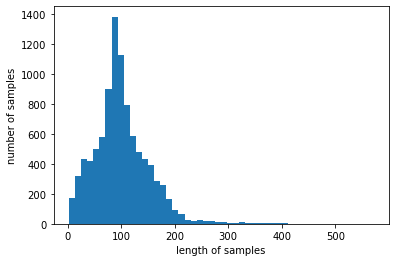

In [39]:
print('자기소개서의 최대 길이 :',max(len(review) for review in tokenized_data))
print('자기소개서 답변의 평균 길이 :',sum(map(len, Atokoken))/len(Atokoken))
plt.hist([len(review) for review in Atokoken], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

# QnA 합친 모델

In [261]:
from gensim.models import Word2Vec

model = Word2Vec(sentences = tokenized_data, vector_size = 300, window = 5, min_count = 0, workers = 5, sg = 0)

In [262]:
model.wv.vectors.shape

(18001, 300)

In [4]:
model2 = Word2Vec.load('./word2vec.model')


# Q 단일 모델

In [40]:
from gensim.models import Word2Vec

Qmodel = Word2Vec(sentences = Qtokoken, vector_size = 300, window = 5, min_count = 0, workers = 5, sg = 0)

In [41]:
Qmodel.wv.vectors.shape

(2268, 300)

In [43]:
print(Qmodel.wv.most_similar("네이티"))

[('외국어', 0.9942147135734558), ('소설', 0.9938887357711792), ('참조', 0.9930259585380554), ('브', 0.9930168390274048), ('홈페이지', 0.9928436279296875), ('스피커', 0.9923147559165955), ('측면', 0.9921711087226868), ('아이티', 0.9912248253822327), ('화장품', 0.9910552501678467), ('페이스북', 0.9906735420227051)]


In [45]:
from functools import reduce 
import operator

#1차원 리스트로 변환
Qword = list(reduce(operator.add, Qtokoken))
Aword = list(reduce(operator.add, Atokoken))



In [58]:
#카운트
import nltk
from nltk import FreqDist

Q2nvocab1 = FreqDist(np.hstack(Qword))
Q2nvocab1 = Q2nvocab1.most_common(500)
Q2tokokenx= pd.DataFrame(Q2nvocab1)
Q2tokokenx.columns=["word","count"]
Q2tokokenx.to_excel('./Q만돌린것.xlsx')

In [55]:
Q2nvocab1

[('기술', 4454),
 ('경험', 3603),
 ('본인', 2779),
 ('시오', 2666),
 ('무엇', 2158),
 ('지원', 2070),
 ('이내', 2056),
 ('대해', 2009),
 ('구체', 1899),
 ('및', 1775),
 ('가장', 1659),
 ('그', 1573),
 ('직무', 1509),
 ('위해', 1499),
 ('과정', 1470),
 ('노력', 1412),
 ('자신', 1369),
 ('작성', 1343),
 ('이유', 1334),
 ('입사', 1172),
 ('생각', 1160),
 ('중', 1075),
 ('목표', 1043),
 ('것', 985),
 ('후', 983),
 ('동기', 982),
 ('대하', 892),
 ('서술', 888),
 ('성장', 879),
 ('수행', 878),
 ('사례', 844),
 ('결과', 806),
 ('가지', 764),
 ('등', 725),
 ('귀하', 716),
 ('활동', 709),
 ('일', 704),
 ('수', 684),
 ('시기', 674),
 ('역량', 673),
 ('조직', 641),
 ('분야', 623),
 ('관련', 608),
 ('입', 589),
 ('포부', 558),
 ('년', 553),
 ('해결', 539),
 ('업무', 537),
 ('상황', 525),
 ('극복', 525),
 ('행동', 518),
 ('위', 518),
 ('성격', 514),
 ('선택', 505),
 ('설명', 482),
 ('회사', 474),
 ('문제', 465),
 ('점', 463),
 ('달성', 461),
 ('통해', 449),
 ('방식', 439),
 ('최근', 439),
 ('준비', 431),
 ('생활', 427),
 ('해당', 427),
 ('이상', 415),
 ('장단점', 400),
 ('경력', 399),
 ('다른', 391),
 ('사람', 387),
 ('열정', 

In [266]:
#카운트
import nltk
from nltk import FreqDist

nvocab1 = FreqDist(np.hstack(Qword))
anvocab1 = FreqDist(np.hstack(Aword))
nvocab1 = nvocab1.most_common(500)
anvocab1 = anvocab1.most_common(500)

In [267]:
Qtokokenx= pd.DataFrame(nvocab1)
Qtokokenx.columns=["word","count"]
Atokokenx= pd.DataFrame(anvocab1)
Atokokenx.columns=["word","count"]
Qtokokenx.to_excel('./Qx_count_nouns.xlsx')
Atokokenx.to_excel('./Ax_count_nouns.xlsx')

In [294]:
QQQ = pd.read_excel('./Qx_count_nouns.xlsx')
AAA = pd.read_excel('./Ax_count_nouns.xlsx')

In [297]:
QQ = QQQ['word']
QQword = QQ.values.tolist()
AA = AAA['word']
AAword = AA.values.tolist()

In [293]:
Qsi = []
for txt in QQword:
    Qsi.append(model.wv.most_similar(txt, topn=10))

In [299]:
Asi = []
for txt in AAword:
    Asi.append(model.wv.most_similar(txt, topn=10))

In [305]:
QQsi= pd.DataFrame(Qsi)
AAsi = pd.DataFrame(Asi)
QQsi.to_excel('./Qx_si.xlsx')
AAsi.to_excel('./Ax_si.xlsx')

In [338]:
model.save('word2vec.model')

In [42]:
Qmodel.save('Qword2vec.model')

In [311]:
token = pd.DataFrame(tokenized_data)
DATA=token

In [3]:
import itertools
import warnings

import matplotlib
from pyasn1.compat.octets import null
from sklearn.metrics import silhouette_score
from text_unidecode import unidecode
from collections import deque

warnings.filterwarnings('ignore')
import csv

import pandas as pd
from sklearn.manifold import TSNE
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import  matplotlib.font_manager as fm
import matplotlib.patches as mpatcheso
import seaborn as sns
import re
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from IPython.display import display, HTML
from sklearn.cluster import KMeans
from sklearn import cluster
from sklearn import metrics
from gensim.models import Word2Vec
from gensim.test.utils import common_texts, get_tmpfile

model2 = Word2Vec.load('./word2vec.model')

ks = range(1, 11)  # for 1 to 10 clusters
word_vectors = model2.wv.vectors
# match_index = model.wv.index2word
# model.init_sims(replace=True)

# sse = []
sil = []
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# X, y = make_blobs(n_samples=500, n_features=2,
#                   centers=4,
#                   cluster_std=1,
#                   center_box=(-10.0, 10.0),
#                   shuffle=True,
#                   random_state=1)
# start the cluster range from 2
range_n_clusters = range(5, 10, 5)
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(word_vectors)
    silhouette_avg = silhouette_score(word_vectors, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    sil.append(silhouette_avg)

print(sil)

For n_clusters = 5 The average silhouette_score is : 0.5584134
[0.5584134]


In [59]:
model3 = Word2Vec.load('./Qword2vec.model')

ks = range(1, 11)  # for 1 to 10 clusters
word_vectors = model3.wv.vectors
# match_index = model.wv.index2word
# model.init_sims(replace=True)

# sse = []
sil = []
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# start the cluster range from 2
range_n_clusters = range(5, 50, 5)
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(word_vectors)
    silhouette_avg = silhouette_score(word_vectors, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    sil.append(silhouette_avg)

print(sil)

For n_clusters = 5 The average silhouette_score is : 0.57958484
For n_clusters = 10 The average silhouette_score is : 0.5498234
For n_clusters = 15 The average silhouette_score is : 0.48010528
For n_clusters = 20 The average silhouette_score is : 0.4614565
For n_clusters = 25 The average silhouette_score is : 0.42610386
For n_clusters = 30 The average silhouette_score is : 0.36711267
For n_clusters = 35 The average silhouette_score is : 0.3281937
For n_clusters = 40 The average silhouette_score is : 0.36971503
For n_clusters = 45 The average silhouette_score is : 0.31309938
[0.57958484, 0.5498234, 0.48010528, 0.4614565, 0.42610386, 0.36711267, 0.3281937, 0.36971503, 0.31309938]


In [60]:
range_n_clusters = range(3, 9)
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(word_vectors)
    silhouette_avg = silhouette_score(word_vectors, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    sil.append(silhouette_avg)

print(sil)

For n_clusters = 3 The average silhouette_score is : 0.612083
For n_clusters = 4 The average silhouette_score is : 0.5891749
For n_clusters = 5 The average silhouette_score is : 0.57958484
For n_clusters = 6 The average silhouette_score is : 0.57373154
For n_clusters = 7 The average silhouette_score is : 0.518686
For n_clusters = 8 The average silhouette_score is : 0.5468611
[0.57958484, 0.5498234, 0.48010528, 0.4614565, 0.42610386, 0.36711267, 0.3281937, 0.36971503, 0.31309938, 0.612083, 0.5891749, 0.57958484, 0.57373154, 0.518686, 0.5468611]


In [14]:
word_vectors = model2.wv.vectors

kmeans_clustering = KMeans(n_clusters=3)
cut = kmeans_clustering.fit(word_vectors)
label = kmeans_clustering.labels_
kmeans_clustering.fit_transform(word_vectors)
idx = kmeans_clustering.fit_predict(word_vectors)
Xt = kmeans_clustering.fit_transform(word_vectors)
print(label)

Xt = list(Xt)
idf = kmeans_clustering.cluster_centers_
idf = list(idf)
idx = list(idx)
names = model2.wv.index_to_key#index2word
center = []
word_centroid_map = {names[i]: idx[i] for i in range(len(names))}


matplotlib.rcParams["axes.unicode_minus"] = False

vocab = list(model2.wv.index_to_key)

# X = model2[vocab]

temp = []
for i in range(len(vocab)):
    a = names.index(vocab[i])
    temp.append(idx[a])

demen = []
print(len(Xt[0]))
for i in range(len(Xt)):
    to = []
    for j in range(len(Xt[i])):
        to.append(str(Xt[i][j]))
    demen.append(to)

[2 2 2 ... 0 0 0]
3


In [62]:
word_vectors = model3.wv.vectors

kmeans_clustering = KMeans(n_clusters=4)
cut = kmeans_clustering.fit(word_vectors)
label = kmeans_clustering.labels_
kmeans_clustering.fit_transform(word_vectors)
idx = kmeans_clustering.fit_predict(word_vectors)
Xt = kmeans_clustering.fit_transform(word_vectors)
print(label)

Xt = list(Xt)
idf = kmeans_clustering.cluster_centers_
idf = list(idf)
idx = list(idx)
names = model3.wv.index_to_key#index2word
center = []
word_centroid_map = {names[i]: idx[i] for i in range(len(names))}


matplotlib.rcParams["axes.unicode_minus"] = False

vocab = list(model3.wv.index_to_key)

# X = model2[vocab]

temp = []
for i in range(len(vocab)):
    a = names.index(vocab[i])
    temp.append(idx[a])

demen = []#클러스터 중심점으로부터의 거리
print(len(Xt[0]))
for i in range(len(Xt)):
    to = []
    for j in range(len(Xt[i])):
        to.append(str(Xt[i][j]))
    demen.append(to)

[3 2 1 ... 0 0 0]
4


In [90]:
Q = []
for i in range(len(total2)):
    Qsum = []
    if total2[i][0] in Qaw:
        Qsum.append(total2[i][0])
        Qsum.append(total2[i][1])
        Qsum.append(Q2nvocab1[i][1])
        Q.append(Qsum)

In [6]:
vectors_w=model2.wv.index_to_key

In [12]:
f = open('4.1K_cos_Qword.csv', 'r', encoding='cp949')

rdr = csv.reader(f)
Q41 = []
for line in rdr:
    Q41.append(line)
f.close() 

In [22]:
Qun =[]
for i in range(len(Q41)):
    Qun.append(Q41[i][0])

In [187]:
len(Q41)

2268

In [39]:
love = []
for txt in vectors_w:
#     print(txt)
    if txt in Qun:
        love.append(model2.wv.most_similar(txt, topn=20))

In [45]:
love[0][0][0]

'언론정보학'

In [47]:
love[1][1][0]

'사실'

In [48]:
step =[]
for i in range(len(love)):
    temp=[]
    for j in range(len(love[i])):
        temp.append(love[i][j][0])
    step.append(temp)

In [53]:
step[0][0]

'언론정보학'

In [51]:
step2 = pd.DataFrame(step)

In [52]:
step2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,언론정보학,매우,더욱,얼마나,것,설치미술,천차만별,중요성,내공,사실,현재상황,뿐,긍정,이처럼,걸,배반,의미,신잡,함,깨
1,얼마나,사실,의미,스스로,조금,매우,거,자신,그것,것임,누구,역시,일인,음,걸,밤낮없이,집중,무언가,생각,수
2,제,남,충만,무언가,누구,늘,사색,성실,스스로,욕심,무슨,재주,항상,뜻,낯,처음,두려움,일이,니,정말
3,적극성,협업,스킬,사례,활동,인턴,역량,커뮤니케이션,조직학,성과,었던,팀워크,강점,성취,노하우,실무,시오,후유증,예입,대외
4,중요시,이기,역시,자신,크게,결여,라면,깨,무언가,능동,이제,강조,보람,일인,내공,것,얼마나,끝점,진정,누구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2263,미사,유통기간,리가,설사,이점,용이,디아,정수,평상시,굴삭기,프로게이머,타로,편법,디테일,수분,이득,당근,베타테스트,나가야,인텔리전트
2264,보호대,꼴찌팀,마는,모서리,던,선생,서른,앞가림,무난,다이어트,겁,뼈,발차기,리액션,지략,부기,김구,탄압,런칭,도취
2265,근대화,제대혈,외로,금융감독원,마당,이력,업력,정림,군인,병역특례병,신용협동조합,우대,법학과,상승세,핏줄,적토마,도피,피앤,은퇴,슈
2266,중소기업청장,시기,오작,오자,오제,시오,이내,가트,사살,특화점,교육실습,사주,주변기기,생체모방,상세,서자,오경,환경기술,기중기,견지


In [177]:
print(len(step))#연관어 정제전
print(len(Qtokoken))

2268
9540


In [73]:
from functools import reduce 
import operator
Qword = list(reduce(operator.add, Qtokoken))

In [203]:
print(len(step))#연관어 정제전
print(len(Qun))#클러스터후 정제 안한 단어들
print(len(Qword))#Qtokoken을 1차원 리스트로 줄인것 
print(len(Q4_400_c))#클러스터해서 정제후 내가 뽑은단어들
print(len(Q41_400_f))#Q

#연관어는 클러스터돌린 csv 저장된 순서대로 저장되어있음.
#그러므로 csv순서대로 짝맞춰서 Q4_400_c순서대로 뽑아야댐

2268
2268
116368
389
389
